# Final Project 
## Raw Analysis

In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

# 1. Data Load

## 1.A State Expenditure 2020
Load State Expenditure data for year 2020

In [2]:
State_Expend_byYear = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/Exp Report Data 1991-2021.xlsm')

State_Expend_byYear = State_Expend_byYear.rename(columns={"YEAR": "Exp_Year"})

## 1.A Load Unemployment Data for 2020-2021

In [3]:
# Load unemployment data (12-Month Data (4/1/2020 – 03/31/2021)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_20_21 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2021 - Twelve Months Ending March 31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_20_21 = Unemployment_Data_20_21.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(c)": "Amount Overpaid", 
                                                      "(b)": "Underpayment Rate", 
                                                      "(d)": "Amount Underpaid", 
                                                      "(a)+(b)": "Improper Payment Rate", 
                                                      "(c)+(d)": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_20_21.head()
Unemployment_Data_20_21['Unemploy_Year']='2021'

In [4]:
state_abbrev = pd.read_csv('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/stateAbbrev.csv')

In [5]:
Unemployment_Data_20_21 = Unemployment_Data_20_21.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_20_21.head(2)
Unemployment_Data_20_21 = Unemployment_Data_20_21.drop(['StateCode', 'Abbrev','Overpayment Rate excl Work Search','Amount Overpaid excl Work Search'], axis=1)

In [6]:
Unemployment_Data_20_21.shape

(52, 11)

In [7]:
dta_21 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2020].merge(Unemployment_Data_20_21, left_on='STATE', right_on='State', how='left')
dta_21.head()

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Fraud Rate,Unemploy_Year,State,Code
0,2020,Alabama,4882.0,1289.000,212.00,41.0,6424.000,1770.0000,1286.000,3215.0,...,0.23671,1.262395e+08,0.00285,1519078.0,0.23956,1.277586e+08,0.13475,2021,Alabama,AL
1,2020,Alaska,1370.3,262.800,46.80,0.0,1679.900,314.3000,140.000,296.3,...,0.08134,2.554232e+07,0.04325,13582376.0,0.12459,3.912470e+07,0.01785,2021,Alaska,AK
2,2020,Arizona,5193.0,1208.000,414.00,0.0,6815.000,849.3061,1026.000,4924.0,...,0.25343,2.329512e+08,0.00000,0.0,0.25343,2.329512e+08,0.14078,2021,Arizona,AZ
3,2020,Arkansas,2289.5,542.767,782.26,0.0,3614.527,776.1700,7.167,3018.8,...,0.22442,3.859883e+07,0.01726,2968952.0,0.24168,4.156779e+07,0.10602,2021,Arkansas,AR
4,2020,California,52258.0,6954.000,161.00,1495.0,60868.000,16431.0000,5811.000,87.0,...,0.07375,1.222937e+09,0.01559,258463590.0,0.08933,1.481401e+09,0.03080,2021,California,CA


## 1.B State Expenditure 2019 & Unemployment Data for 2020

In [8]:
# Load unemployment data (12-Month Data (4/1/2019 – 03/31/2020)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_19_20 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2020-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_19_20 = Unemployment_Data_19_20.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_19_20.head()
Unemployment_Data_19_20['Unemploy_Year']='2020'

Unemployment_Data_19_20 = Unemployment_Data_19_20.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')

Unemployment_Data_19_20 = Unemployment_Data_19_20.drop(['Abbrev','Overpayment Rate 2','Unnamed: 10','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)
Unemployment_Data_19_20.head(2)
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,Code
0,79074510.0,0.09142,7228731.0,0.00889,702695.0,0.10030,7931427.0,2831646.0,2020,Alaska,AK
1,140932713.0,0.09557,13468990.0,0.00200,281883.0,0.09757,13750873.0,4890694.0,2020,Alabama,AL


In [9]:
dta_20 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2019].merge(Unemployment_Data_19_20, left_on='STATE', right_on='State', how='left')

In [10]:
dta_20.shape

(51, 104)

## 1.C State Expenditure 2018 & Unemployment Data for 2019

In [11]:
# Load unemployment data (12-Month Data (4/1/2018 – 03/31/2019)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_18_19 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2019-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rates', header = 6, skipfooter = 6)
Unemployment_Data_18_19 = Unemployment_Data_18_19.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Fraud Rate"
                                                     })
Unemployment_Data_18_19.head()
Unemployment_Data_18_19['Unemploy_Year']='2019'

Unemployment_Data_18_19 = Unemployment_Data_18_19.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_18_19.head(2)
Unemployment_Data_18_19 = Unemployment_Data_18_19.drop(['Abbrev','Overpayment Rate 2','Unnamed: 10','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)

# , 'Abbrev'

In [12]:
dta_19 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2018].merge(Unemployment_Data_18_19, left_on='STATE', right_on='State', how='left')

In [13]:
dta_19

,Exp_Year,STATE,ELSED_GF,ELSED_FF,ELSED_OF,ELSED_BF,ELSED_TOT,HGRED_GF,HGRED_FF,HGRED_OF,...,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,Code
0,2018,Alabama,4418.000000,1051.000000,238.000000,27.000000,5734.000000,1597.000000,1085.000000,3012.000000,...,0.07299,10881176.0,0.00046,68529.0,0.07345,10949705.0,6406740.0,2019,Alabama,AL
1,2018,Alaska,1401.700000,230.000000,38.000000,0.000000,1669.700000,327.000000,119.000000,332.000000,...,0.11389,10080630.0,0.00534,473002.0,0.11923,10553632.0,2813283.0,2019,Alaska,AK
2,2018,Arizona,4528.000000,1124.000000,407.000000,0.000000,6059.000000,705.000000,912.000000,4678.000000,...,0.15543,31557900.0,0.00006,11538.0,0.15549,31569439.0,17038908.0,2019,Arizona,AZ
3,2018,Arkansas,2258.766615,542.594243,832.742439,0.000000,3634.103297,784.979012,7.431464,3128.912081,...,0.10471,10203598.0,0.00263,256671.0,0.10735,10460269.0,5182674.0,2019,Arkansas,AR
4,2018,California,48762.000000,6721.000000,50.000000,603.000000,56136.000000,14446.000000,5220.000000,208.000000,...,0.07752,387675371.0,0.00134,6703913.0,0.07886,394379284.0,84138220.0,2019,California,CA
5,2018,Colorado,4080.000000,595.000000,4804.000000,0.000000,9479.000000,947.000000,281.000000,4671.000000,...,0.10206,38247246.0,0.00662,2481707.0,0.10868,40728952.0,9155118.0,2019,Colorado,CO
6,2018,Connecticut,3084.000000,550.000000,2.000000,518.000000,4154.000000,640.300395,225.000000,2341.000000,...,0.13002,75043360.0,0.00350,2021832.0,0.13353,77065192.0,7600304.0,2019,Connecticut,CT
7,2018,Delaware,1435.000000,196.000000,785.000000,129.000000,2545.000000,238.000000,51.000000,113.000000,...,0.06815,4148927.0,0.00265,161478.0,0.07081,4310405.0,1652700.0,2019,Delaware,DE
8,2018,Florida,11445.000000,1853.000000,1291.000000,0.000000,14589.000000,4546.000000,95.000000,3215.000000,...,0.10016,32216293.0,0.00013,42957.0,0.10029,32259250.0,0.0,2019,Florida,FL
9,2018,Georgia,9604.915835,2309.644687,383.400653,252.325000,12550.286175,2802.937308,61.210309,6493.377767,...,0.04078,12250762.0,0.00016,48282.0,0.04094,12299045.0,8683103.0,2019,Georgia,GA


## 1.D State Expenditure 2017 & Unemployment Data for 2018

In [14]:
# Load unemployment data (12-Month Data (4/1/2017 – 03/31/2018)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_17_18 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2018-twelvemonthsendingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 6, skipfooter = 6)
Unemployment_Data_17_18  = Unemployment_Data_17_18.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_17_18.head()
Unemployment_Data_17_18['Unemploy_Year']='2018'

Unemployment_Data_17_18 = Unemployment_Data_17_18.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_17_18.head(2)
Unemployment_Data_17_18 = Unemployment_Data_17_18.drop(['Work Search Rate','Rate $','Abbrev','Overpayment Rate 2','Sample','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1',], axis=1)

# , 'Abbrev'

In [15]:
dta_18 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2017].merge(Unemployment_Data_17_18, left_on='STATE', right_on='State', how='left')

In [16]:
dta_18.shape

(51, 104)

## 1.E State Expenditure 2016 & Unemployment Data for 2017

In [17]:
# Load unemployment data (12-Month Data (4/1/2016 – 03/31/2017)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_16_17 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2017-TwelveMonthsEndingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 6, skipfooter = 11)
Unemployment_Data_16_17  = Unemployment_Data_16_17.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_16_17.head()
Unemployment_Data_16_17['Unemploy_Year']='2017'

Unemployment_Data_16_17 = Unemployment_Data_16_17.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_16_17 = Unemployment_Data_16_17.drop(['Unnamed: 9','Overpayment Rate 2'], axis=1)
Unemployment_Data_16_17.shape
# , 'Abbrev'

(52, 12)

In [18]:
dta_17 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2016].merge(Unemployment_Data_16_17, left_on='STATE', right_on='State', how='left')

In [19]:
dta_17.shape # check 51 rows

(51, 105)

## 1.F State Expenditure 2015 & Unemployment Data for 2016

In [20]:
# Load unemployment data (12-Month Data (4/1/2015 – 03/31/2016)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_15_16 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2016-TwelveMonthsEndingMarch31.xlsx', sheet_name='Improper Payment Rate', header = 8, skipfooter = 6)
Unemployment_Data_15_16  = Unemployment_Data_15_16.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "(a)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "(b)": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Work Search Rate"
                                                     })
Unemployment_Data_15_16.head()
Unemployment_Data_15_16['Unemploy_Year']='2016'

Unemployment_Data_15_16 = Unemployment_Data_15_16.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_15_16 = Unemployment_Data_15_16.drop(['Work Search Rate','Rate $','Abbrev','StateCode','[(b)+(d)-(e)]','(amount paid)]','Errors','Errors.1'], axis=1)
Unemployment_Data_15_16.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Amount Underpaid,Improper Payment Rate,Amount Improperly Paid,Improper Payment Recovered,Unemploy_Year,State,Code
0,125269534,0.10358,12975040,0.00170,213330,0.10528,13188370,4076621,2016,Alaska,AK
1,203285637,0.06134,12469708,0.00399,811589,0.06533,13281297,11215354,2016,Alabama,AL
2,223389486,0.10092,22544479,0.00559,1248120,0.10651,23792599,10626306,2016,Arkansas,AR
3,264569022,0.07693,20353647,0.00091,240816,0.07784,20594463,23167626,2016,Arizona,AZ
4,5263022268,0.06874,361768920,0.00730,38442457,0.07604,400211377,96301843,2016,California,CA


In [21]:
dta_16 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2015].merge(Unemployment_Data_15_16, left_on='STATE', right_on='State', how='left')

In [22]:
dta_16.shape # check rows

(51, 104)

## 1.G State Expenditure 2014 & Unemployment Data for 2015

In [23]:
# Load unemployment data (12-Month Data (4/1/2014 – 03/31/2015)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_14_15 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2015-12-MonthData.xls', sheet_name='Improper Payment Rate', header = 6, skipfooter = 6)
Unemployment_Data_14_15  = Unemployment_Data_14_15.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "OP (1)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "OP (1).1": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                      "Rate": "Underpayment Rate",
                                                       "Rate $": "Underpayment Rate $",
                                                      "Rate.1":"Improper Payment Rate",
                                                        "Dollars": "Improper Payment Rate",
                                                        "Recovered": "Dollars Recovered",
                                                    "Paid": "Amount Improperly Paid",
                                                     })
Unemployment_Data_14_15.head()
Unemployment_Data_14_15['Unemploy_Year']='2015'

Unemployment_Data_14_15 = Unemployment_Data_14_15.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_14_15 = Unemployment_Data_14_15.drop(['Dollars Recovered','Underpayment Rate $','Abbrev','StateCode'], axis=1)
Unemployment_Data_14_15.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Amount Overpaid,Underpayment Rate,Improper Payment Rate,Amount Improperly Paid,Improper Payment Rate,Unemploy_Year,State,Code
0,1.343778e+08,0.16501,22173706.0,0.00248,22506428.0,18344126.0,0.136512,2015,Alaska,AK
1,2.339668e+08,0.06192,14487848.0,0.00039,14578224.0,2399676.0,0.010256,2015,Alabama,AL
2,2.456021e+08,0.10511,25815329.0,0.00709,27557681.0,17595429.0,0.071642,2015,Arkansas,AR
3,3.065588e+08,0.12206,37417044.0,0.00079,37658327.0,9364651.0,0.030548,2015,Arizona,AZ
4,5.742496e+09,0.07445,427502592.0,0.00231,440788511.0,388163048.0,0.067595,2015,California,CA


In [24]:
dta_15 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2014].merge(Unemployment_Data_14_15, left_on='STATE', right_on='State', how='left')

In [25]:
dta_15.shape

(51, 103)

## 1.H State Expenditure 2013 & Unemployment Data for 2014

In [26]:
# Load unemployment data (12-Month Data (4/1/2013 – 03/31/2014)
# Improper payment data for the Unemployment Insurance (UI) program derived from the Benefit Accuracy Measurement (BAM) program for the 12-month period ending March 31, 2021. BAM is a quality control statistical survey used to identify errors and support corrective action in the state unemployment insurance (UI) system. Data includes improper payment percentages, total dollar amounts, and root cause by state.
Unemployment_Data_13_14 = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/2014-12-MonthData.xls', sheet_name='Integrity Rate', header = 7, skipfooter = 6)
Unemployment_Data_13_14  = Unemployment_Data_13_14.rename(columns={"ST": "StateCode", 
                                                      "Amount Paid": "Total Unemployment Paid", 
                                                      "OP (1)": "Overpayment Rate", 
                                                      "(OP) Rate***": "Overpayment Rate 2",            
                                                      "(c)": "Underpayment Rate", 
                                                      "OP (1).1": "Amount Overpaid", 
                                                      "(d)": "Amount Underpaid", 
                                                      "[(a)+(c)]": "Improper Payment Rate", 
                                                      "(e)":"Improper Payment Recovered",
                                                      "[(b)+(d)]": "Amount Improperly Paid", 
                                                      "Work. Search.": "Overpayment Rate excl Work Search",
                                                      "Work. Search..1": "Amount Overpaid excl Work Search",
                                                       "Rate $": "Underpayment Rate $",
                                                      "Rate.1":"Fraud Rate",
                                                        "Dollars": "Improper Payment Rate",
                                                        "Recovered": "Dollars Recovered",
                                                    "Paid": "Amount Improperly Paid",
                                                     "(OP)": "Overpayment Rate",
                                                        "(UP)": "Underpayment Rate",
                                                    "Rates": "Improper Payment Rate",   
                                                 "OP+UP-Reco": "Improper Payment Rate Less Recov",

                                                                   
                                                     })
Unemployment_Data_13_14.head()
Unemployment_Data_13_14['Unemploy_Year']='2014'

Unemployment_Data_13_14 = Unemployment_Data_13_14.merge(state_abbrev, left_on='StateCode', right_on='Code', how='left')
Unemployment_Data_13_14 = Unemployment_Data_13_14.drop(['OP+UP-Recov','Rate','Abbrev','StateCode'], axis=1)
Unemployment_Data_13_14.head()
# , 'Abbrev'

,Total Unemployment Paid,Overpayment Rate,Underpayment Rate,Improper Payment Rate,Fraud Rate,Unemploy_Year,State,Code
0,1.590150e+08,0.07238,0.00885,0.08124,0.02745,2014,Alaska,AK
1,2.851954e+08,0.09533,0.00101,0.09634,0.03045,2014,Alabama,AL
2,3.010971e+08,0.09707,0.00270,0.09977,0.05268,2014,Arkansas,AR
3,3.352142e+08,0.12417,0.00049,0.12466,0.05354,2014,Arizona,AZ
4,6.188412e+09,0.06677,0.00188,0.06865,0.04561,2014,California,CA


In [27]:
dta_14 = State_Expend_byYear[State_Expend_byYear['Exp_Year']==2013].merge(Unemployment_Data_13_14, left_on='STATE', right_on='State', how='left')

In [28]:
dta_14.shape # check rows

(51, 101)

## 2 Combine all the individual tables
Expenditure and unemployment data, 2016 - 2021

In [29]:
dta_21 = dta_21.reset_index()
dta_20 = dta_20.reset_index()
dta_19 = dta_19.reset_index()
dta_18 = dta_18.reset_index()
dta_17 = dta_17.reset_index()
dta_16 = dta_16.reset_index()

# giving me issues in concat - will resolve later
dta_15 = dta_15.reset_index() 
dta_14 = dta_14.reset_index()

In [30]:
dta_comb = pd.concat([dta_21,dta_20, dta_19, dta_18, dta_17, dta_16], sort = False)

In [31]:
dta_comb.shape # check all data loaded

(306, 108)

In [32]:
# Select only the columns we care about
dta_select = dta_comb[["Amount Overpaid", "Total Unemployment Paid", "Improper Payment Rate", "Fraud Rate", "Unemploy_Year", "State", "Code", "FFTOT_CAPI", "OTHCP_FF", "TOTAL_CAPI", "GFTOT_CAPI", "OFTOT_CAPI", "FFTOT_CAP", "TOTAL REV"]]

In [33]:
dta_select.shape

(306, 14)

<AxesSubplot:>

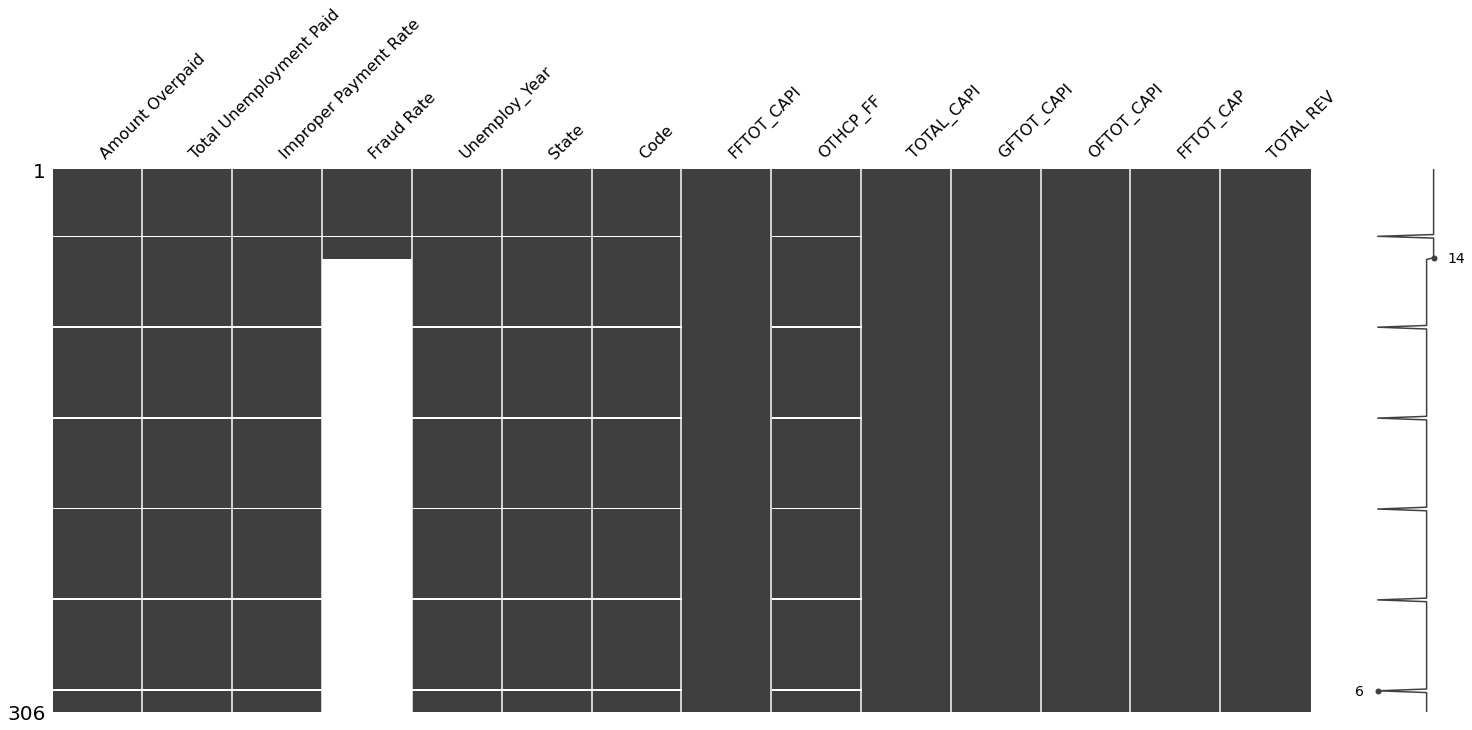

In [34]:
miss.matrix(dta_select) # None

In [35]:
dta_select = dta_select.dropna()

In [36]:
dta_select.dtypes

Amount Overpaid            float64
Total Unemployment Paid    float64
Improper Payment Rate      float64
Fraud Rate                 float64
Unemploy_Year               object
State                       object
Code                        object
FFTOT_CAPI                 float64
OTHCP_FF                   float64
TOTAL_CAPI                 float64
GFTOT_CAPI                 float64
OFTOT_CAPI                 float64
FFTOT_CAP                  float64
TOTAL REV                  float64
dtype: object

In [37]:
# Change datatypes
dta_select["Unemploy_Year"] = dta_select["Unemploy_Year"].astype('int32')

#.

## 3 Split data set to view and explore
Expenditure and unemployment data, 2016 - 2021

In [38]:
y = dta_select[['Improper Payment Rate']]
X = dta_select.drop(columns=['Improper Payment Rate'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)


In [39]:
# Check data divided properly
print(train_X.shape[0]/dta_select.shape[0])
print(test_X.shape[0]/dta_select.shape[0])

0.74
0.26


## 4 Explore Training Set

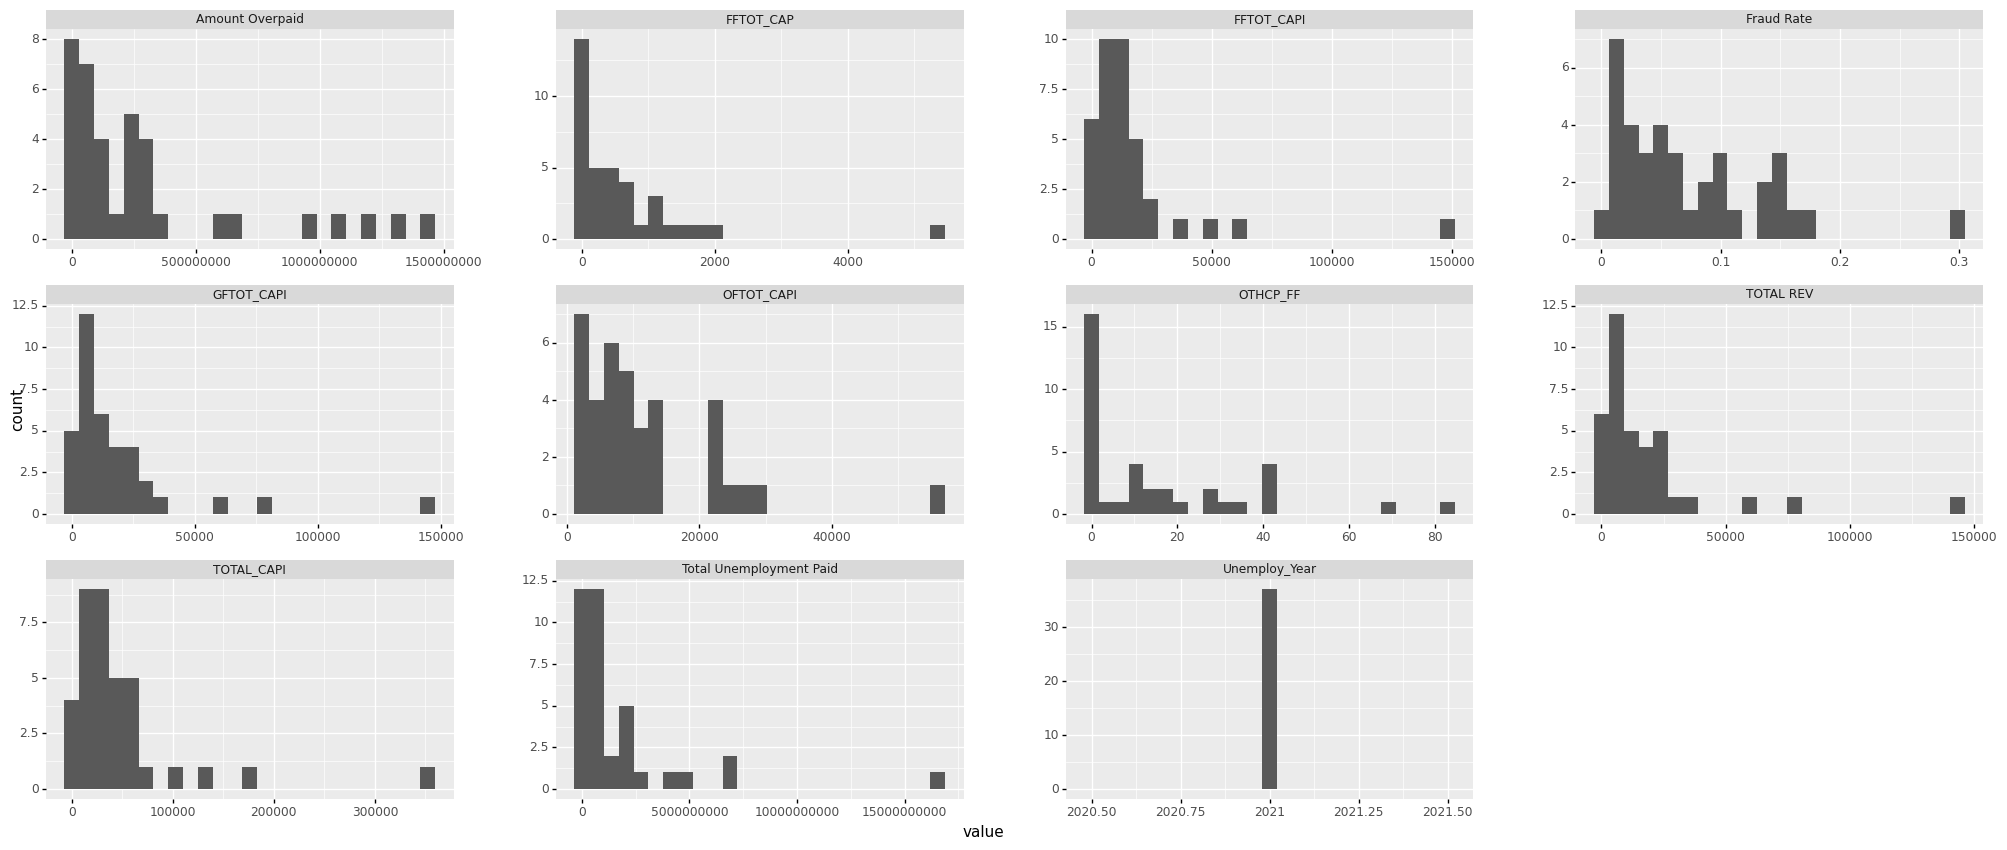

<ggplot: (322405765)>

In [46]:
# Plot the continuous Variables 
d = train_X.select_dtypes(include=["int","float64"]).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(25,10),
          subplots_adjust={'wspace':0.25, 'hspace':0.25})
)

# 0. Appendix

In [41]:
# Load first dataset (Source: https://www.kff.org/statedata/custom-state-report/?32139-year-=2019&view=3&i=32148~460185~32141~32139~32132~32136&g=us~al~ak~az~ar~ca~co~ct~de~dc~fl~ga~hi~id~il~in~ia~ks~ky~la~me~md~ma~mi~mn~ms~mo~mt~ne~nv~nh~nj~nm~ny~nc~nd~oh~ok~or~pa~ri~sc~sd~tn~tx~ut~vt~va~wa~wv~wi~wy)
Poverty_Expenditure = pd.read_excel('/Users/abhatti/Documents/masterInScience/PPOL564/Final Project/Final-Project-Unemployment-Analysis/data/statehealthfacts.xlsx')
dta = Poverty_Expenditure.melt(id_vars="Unnamed: 0")
dta = dta.rename(columns={"Unnamed: 0": "Features", "variable": "State"})
pv = dta.pivot_table(index=["State"], 
                    columns='Features', 
                    values='value')
Poverty_Expenditure = pv

In [42]:
Poverty_Expenditure.head()

Features,Poverty Rate by Age: 65+,Poverty Rate by Age: Adults 19-64,Poverty Rate by Age: Children 0-18,Poverty Rate by Age: Total,Poverty Rate by Race/Ethnicity: American Indian/Alaska Native,Poverty Rate by Race/Ethnicity: Asian/Native Hawaiian and Pacific Islander,Poverty Rate by Race/Ethnicity: Black,Poverty Rate by Race/Ethnicity: Hispanic,Poverty Rate by Race/Ethnicity: Multiple Races,Poverty Rate by Race/Ethnicity: Total,Poverty Rate by Race/Ethnicity: White,Total State Expenditures (in millions)
State,,,,,,,,,,,,
Alabama,0.105,0.148,0.208,0.154,0.156,0.107,0.236,0.244,0.186,0.154,0.115,28834.0
Alaska,0.083,0.101,0.133,0.107,0.240,NaN,NaN,0.149,0.069,0.107,0.069,11148.0
Arizona,0.091,0.126,0.187,0.134,0.290,0.115,0.175,0.182,0.153,0.134,0.092,38691.0
Arkansas,0.103,0.156,0.230,0.165,0.155,0.125,0.289,0.201,0.227,0.165,0.134,25639.0
California,0.104,0.106,0.157,0.118,0.203,0.090,0.193,0.150,0.107,0.118,0.084,300445.0


In [43]:
state_abbrev.head(2)

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK


In [44]:
fullData = Poverty_Expenditure.merge(Unemployment_Data, left_on='State', right_on='State', how='left')

NameError: name 'Unemployment_Data' is not defined

In [ ]:
fullData

In [ ]:
# define the url and ready data
url = "https://ballotpedia.org/Total_state_government_expenditures#Fiscal_year_2017"


In [ ]:
## Scrape statebudgets from '17-'14

url = "https://ballotpedia.org/Total_state_government_expenditures#Fiscal_year_2017"
cities = pd.read_html(url)

cities

cities[4]